01)
--

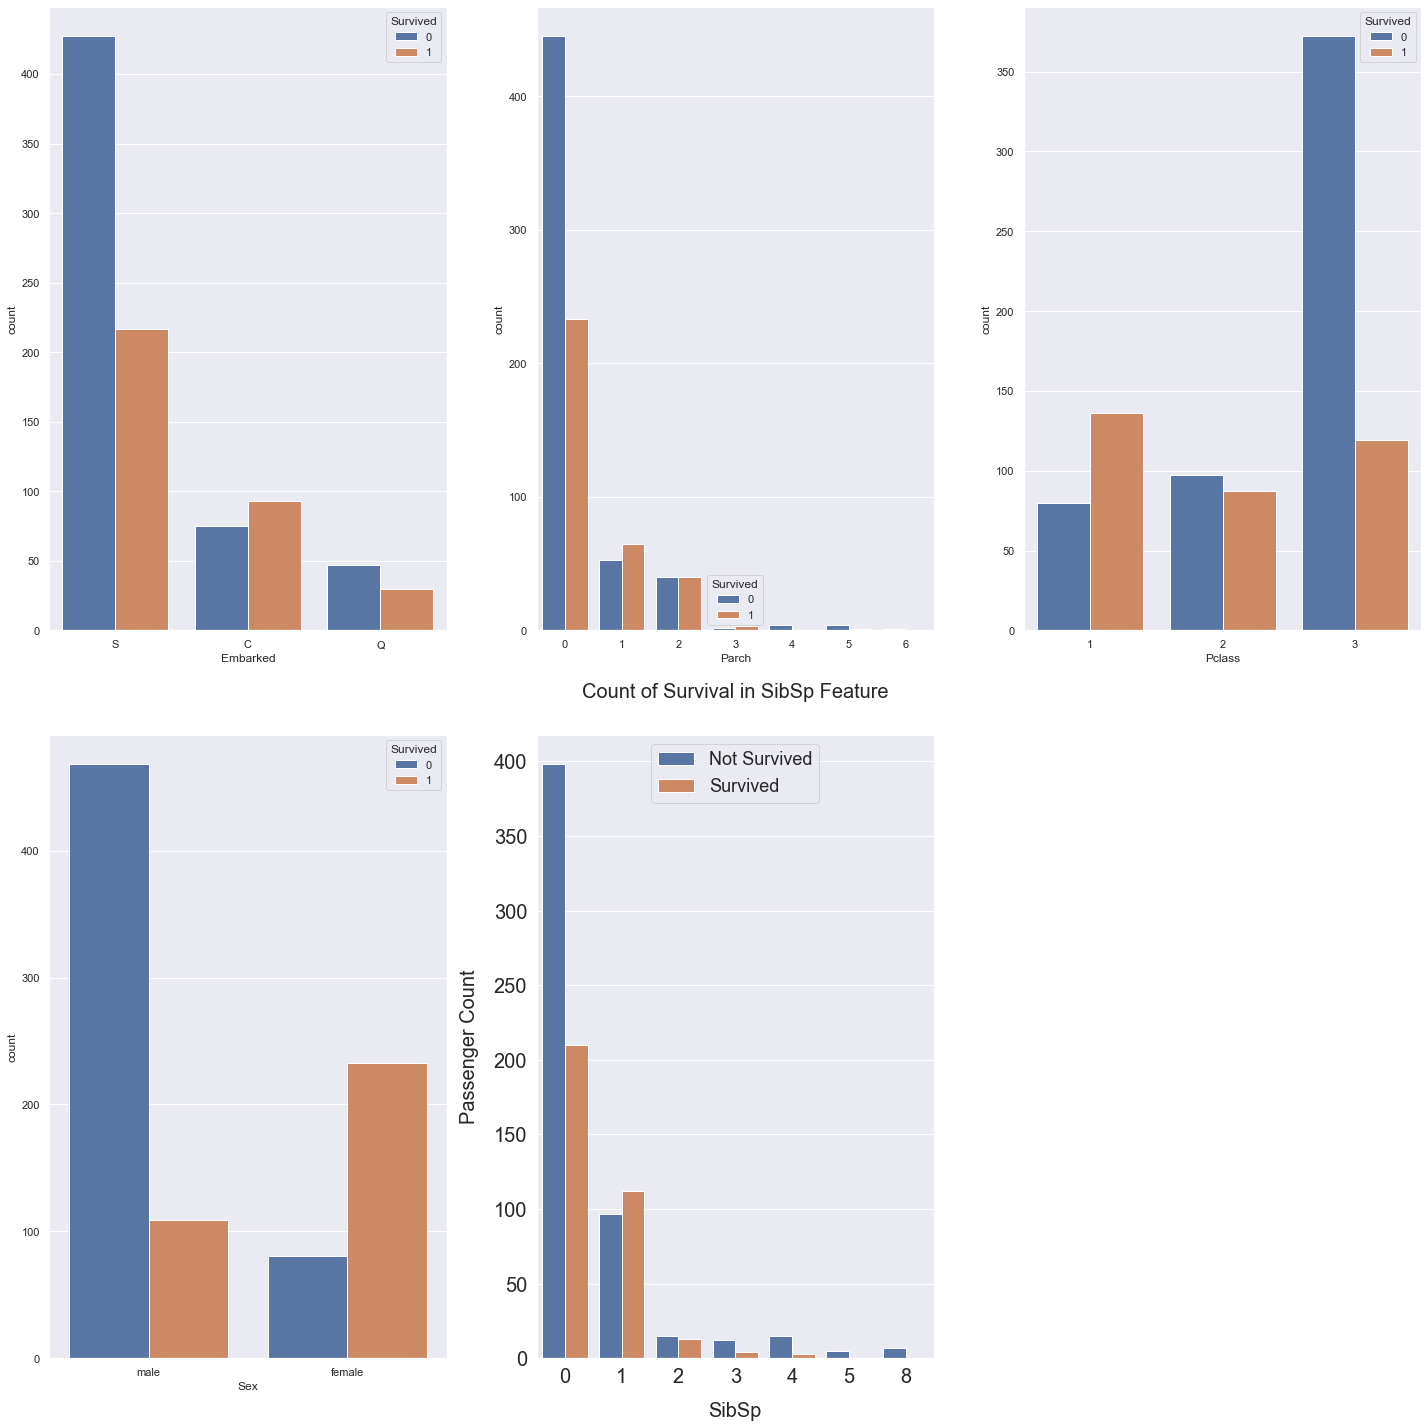

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_train = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_train.csv')
df_test = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_test.csv')
df_all = concat_df(df_train, df_test)
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'
dfs = [df_train, df_test]


cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)

plt.xlabel('{}'.format(feature), size=20, labelpad=15)
plt.ylabel('Passenger Count', size=20, labelpad=15)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)
plt.tight_layout()
plt.show()

Dari plot yang dihasikan kita dapat melihat, ternyata penumpang yang berangkat dari Cherbourg lebih banyak yang selamat, sedangkan penumpang dari Southampton, hanya setengahnya yang selamat.

Untuk orang yang membawa hanya 1 Parent/Children, lebih banyak yang selamat.

Untuk orang dengan Kelas Penumpang 1, kemungkinan selamatnya jauh lebih tinggi. Dan penumpang dengan Kelas Penumpang 3 hanya sedikit yang selamat.

Dan Orang yang membawa 1 Sibling/Spouse kemungkinan selamatnya jauh lebih besar.

Orang yang membawa 2 Sibling/Spouse kemungkinan selamatnya cukup kecil.

02)
--


Untuk Data Fare dan Age, kita akan membaginya ke dalam beberapa Bin/Group.

Dari fungsi describe sebelumnya, kita tahu bahwa minimal usia yang ada adalah 0.17 tahun dan yang tertua adalah 80 tahun. Sehingga saya rasa membaginya dengan 13 kelompok quantile cukup.

Dan untuk Fare termurah adalah 0 dan termahal adalah 512 (lihat hasil statistik dekriptifnya). Sehingga saya rasa membaginya dengan 10 kelompok quantile cukup.

Perintah yang pertama bermaksud untuk membagi Fare menjadi 13 bagian dengan fungsi qcut().

Dan perintah yang kedua adalah untuk menggambarkan plot group usia terhadap tingkat keselamatan.

Dapat dilihat bahwa semakin mahal harga tiketnya, semakin besar kemungkinan orang itu selamat, dimulai dari harga 56 ke atas.

Tetapi banyak orang yang selamat dimulai dari 10.5 sudah cukup meningkat, kecuali kejadian yang terjadi pada kelompok pemegang tiket berharga 13-15.742.

 

Note:
--

Untuk pembagian jumlah bins yang berbeda baik 13 bins untuk "Age" dan 10 bins untuk "Fare" tidak aturan bakunya. Tetapi yang diinginkan dari visualisasi berdasarkan pembagian dengan jumlah bins adalah sebaran datanya. 

Sebagai contoh untuk "Age" yang memiliki range data 0 (min) s/d 80 (max). Untuk itu, awalnya membagi data menjadi 8 bins katakanlah cukup untuk mereprsentasikan sebaran data. Ketika setelah dicek dengan visualisasi sebarannya belum mewakili dan adanya skew. Selanjutnya, kita dapat menaikkan/menurunkan jumlah bins untuk melihat sebaran data berikut. Untuk "Age" ini terpilihlah 13 bins yang cocok untuk mepresentasikan sebaran data. Dengan cara yang sama dapat juga diterapkan untuk "Fare".

Jadi tidak ada aturan baku yang mengatur jumlah bins tersebut.

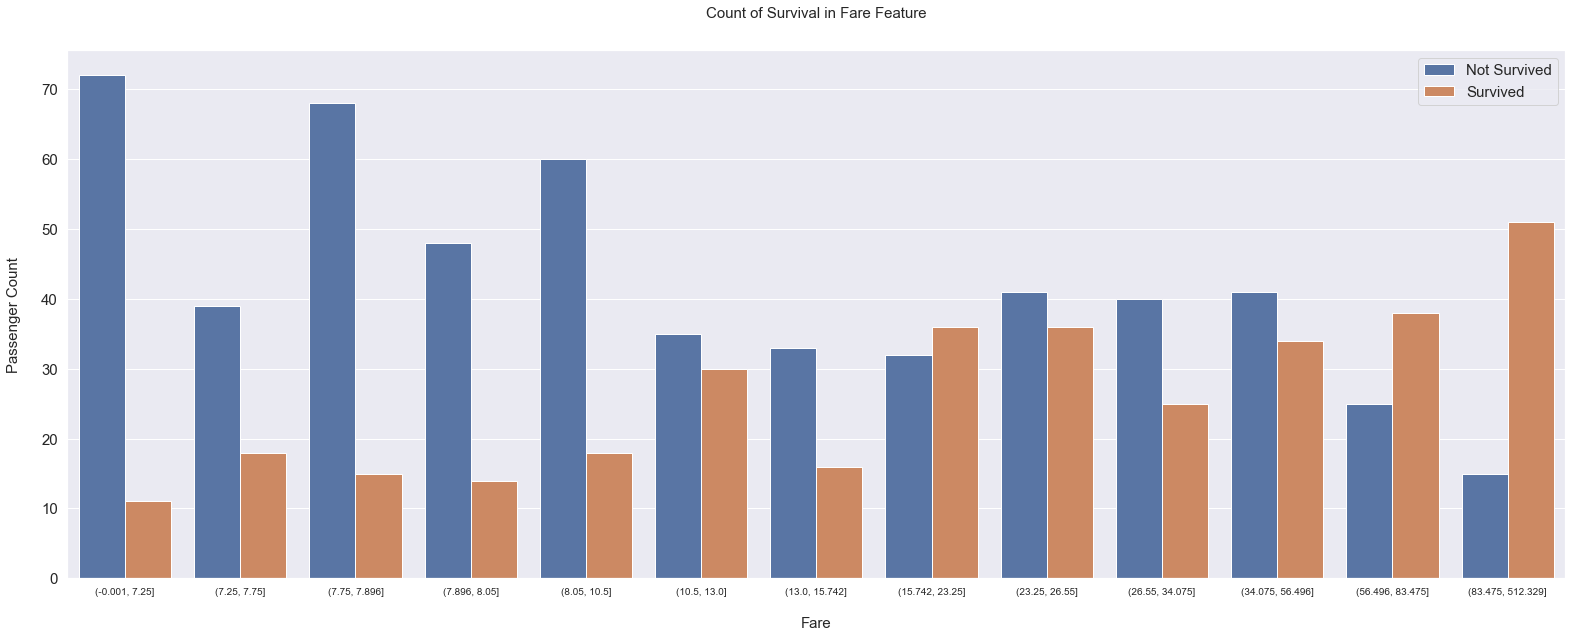

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_train = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_train.csv')
df_test = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_test.csv')
df_all = concat_df(df_train, df_test)
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'
dfs = [df_train, df_test]

age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
df_all['Embarked'] = df_all['Embarked'].fillna('S')
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)
plt.tight_layout()
plt.show()